In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

In [2]:
# Charger les données dans un DataFrame
ds = pd.read_csv("/content/drive/MyDrive/ekinox/data/student_data.csv", delimiter=",")

In [3]:
ds.shape

(357, 34)

In [4]:
ds.head()

,StudentID,FirstName,FamilyName,school,sex,age,address,famsize,Pstatus,Medu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,Rafael,Morais,GP,F,18,U,GT3,A,4,...,no,no,4,3,4,1,1,3,6,6
1,1,Lara,Braga,GP,F,17,U,GT3,T,1,...,yes,no,5,3,3,1,1,3,4,6
2,2,Gonçalo,Azevedo,GP,F,15,U,LE3,T,1,...,yes,no,4,3,2,2,3,3,10,10
3,3,Lara,Perna,GP,F,15,U,GT3,T,4,...,yes,yes,3,2,2,1,1,5,2,15
4,4,João,Pires,GP,F,16,U,GT3,T,3,...,no,no,4,3,2,1,2,5,4,10


In [5]:
ds.describe()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,193.176471,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,115.771252,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,89.000000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,196.000000,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,292.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


la variable "absences" a une plage de valeurs très différente des autres variables, avec une valeur maximale de 75, alors que toutes les autres variables ont une plage de valeurs maximales de 5. Il peut être judicieux de normaliser cette variable pour faciliter la comparaison avec les autres variables.

In [6]:
# Vérifier les données manquantes pour chaque colonne
ds.isnull().sum()

StudentID     0
FirstName     0
FamilyName    0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
FinalGrade    0
dtype: int64

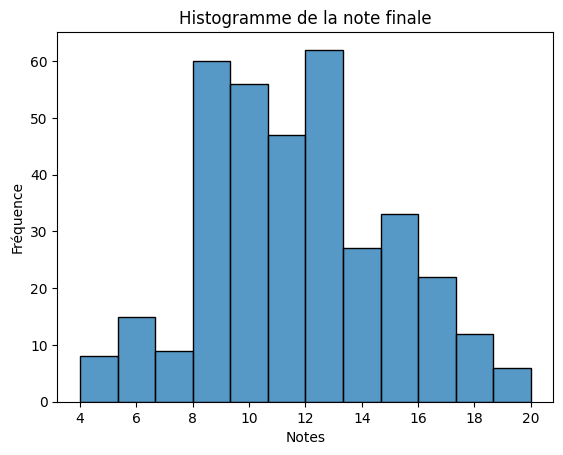

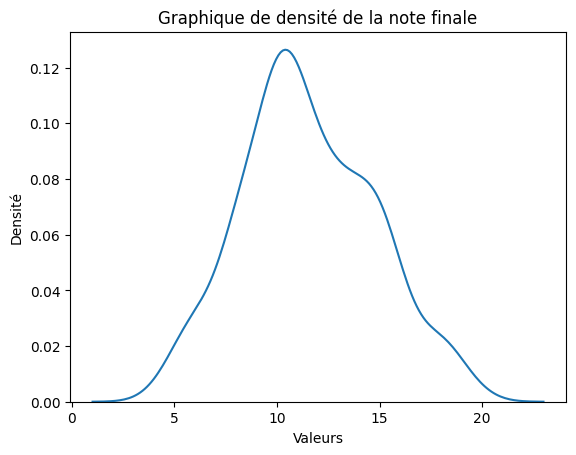

In [7]:
# Affichage de l'histogramme
sns.histplot(ds["FinalGrade"], kde=False)
plt.title("Histogramme de la note finale")
plt.xlabel("Notes")
plt.ylabel("Fréquence")
plt.show()

# Affichage du graphique de densité
sns.kdeplot(ds["FinalGrade"])
plt.title("Graphique de densité de la note finale")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.show()

In [8]:
# Extraire les colonnes à normaliser
num_cols = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

# Normaliser les données
scaler = StandardScaler()
ds[num_cols] = scaler.fit_transform(ds[num_cols])

<ipython-input-15-af853a1b9554>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ds.corr()


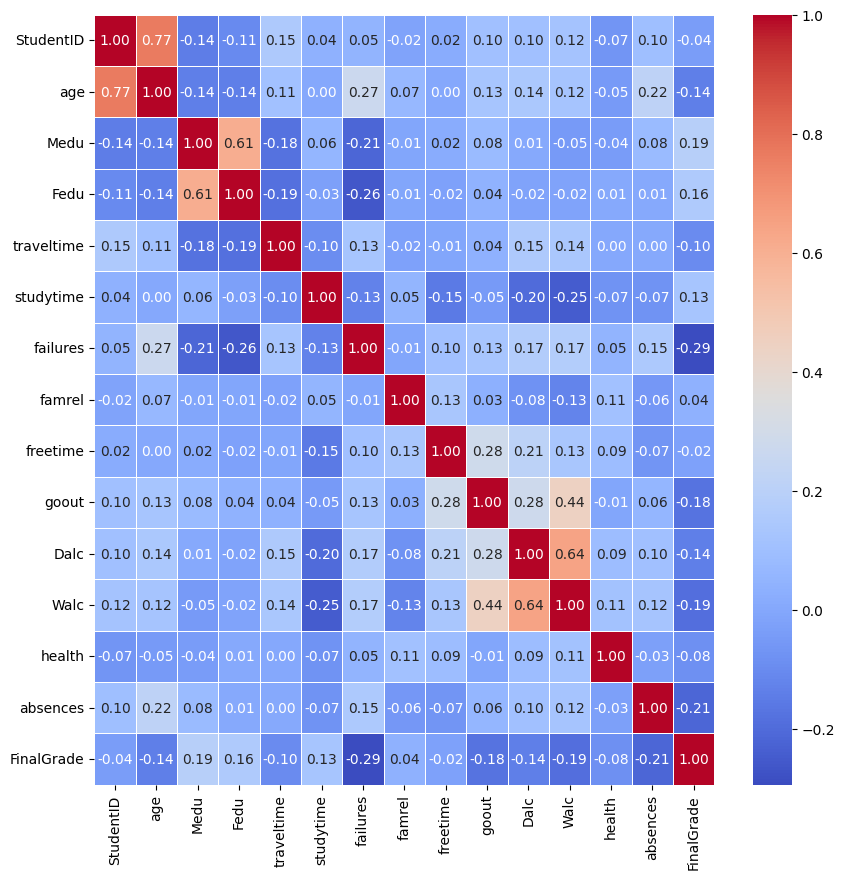

In [15]:
# Créer une matrice de corrélation
corr_matrix = ds.corr()

# Créer une heatmap avec les valeurs annotées
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)

# Afficher la heatmap
plt.show()

<Figure size 1000x1000 with 0 Axes>

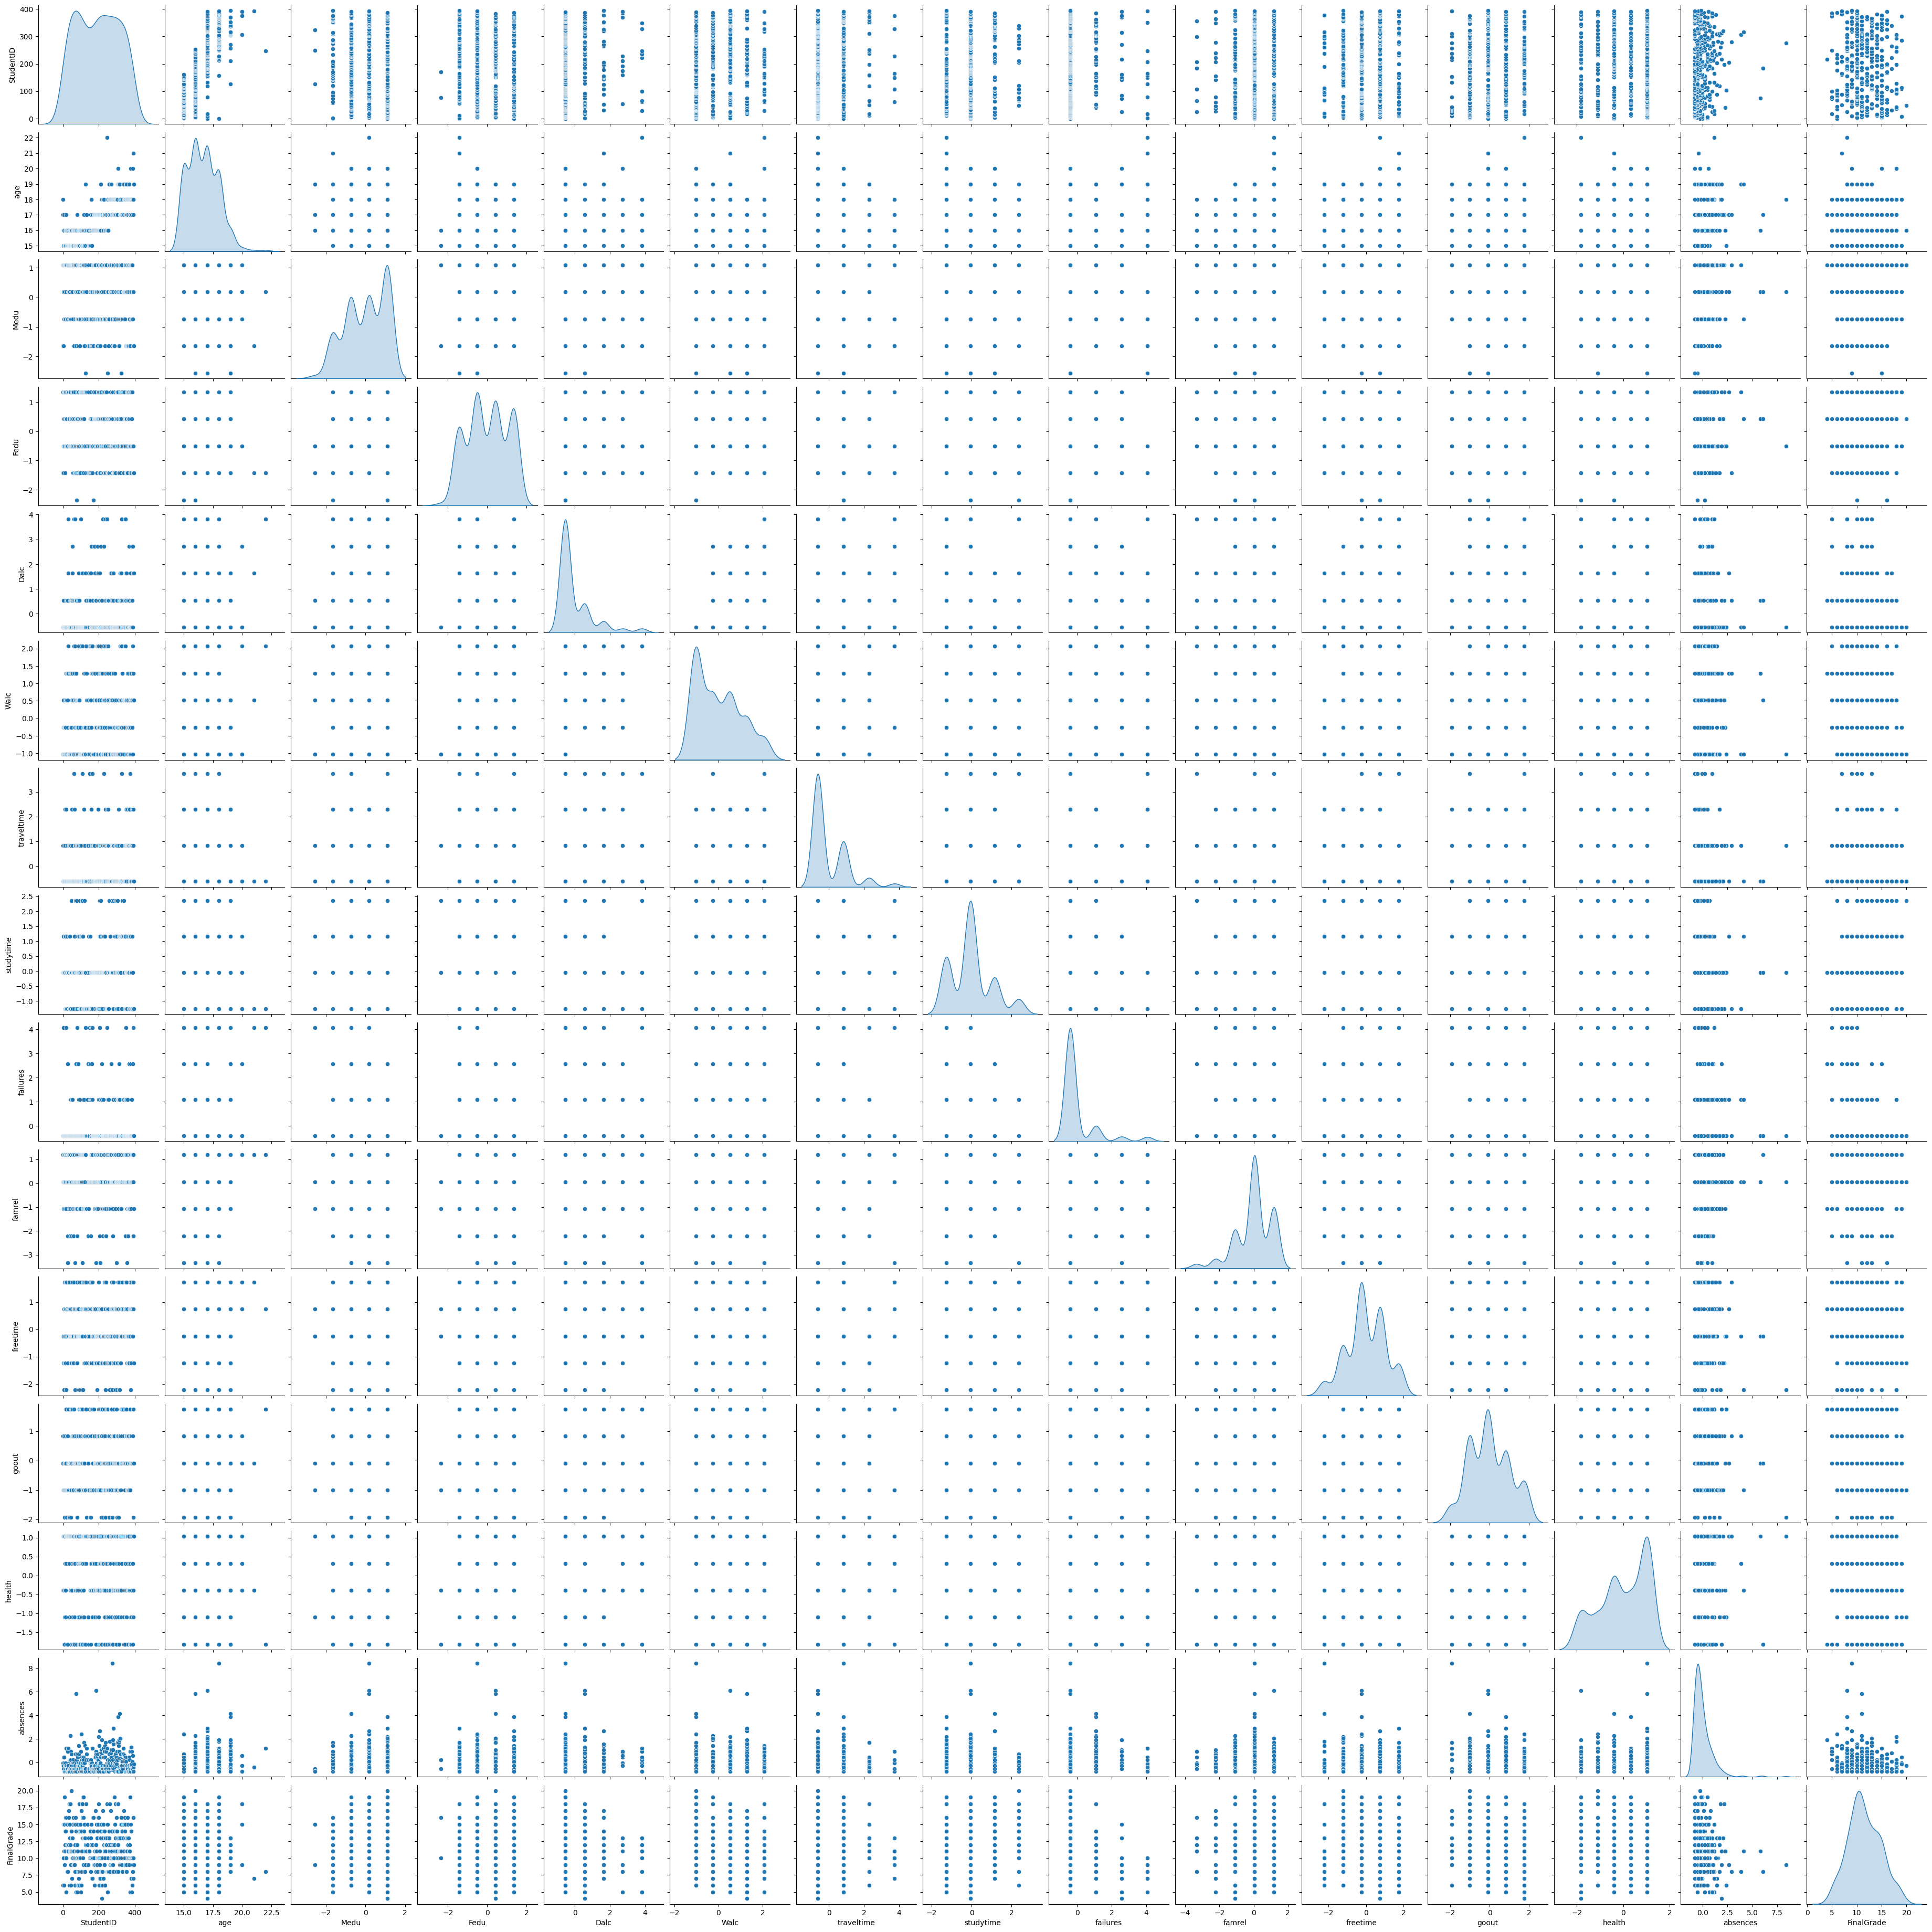

In [14]:
# Afficher les graphiques de dispersion pour les paires de variables avec une corrélation > 0.5 ou < -0.5
high_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
plt.figure(figsize=(10, 10))
sns.pairplot(ds[high_corr.notnull().sum().sort_values(ascending=False).index], diag_kind="kde")
plt.show()

In [9]:
ds.shape

(357, 34)

In [10]:
# sélection des variables catégorielles
categorical_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# codage one-hot des variables catégorielles
onehot_data = pd.get_dummies(ds, columns=categorical_vars)

In [24]:
onehot_data.shape

(357, 60)

In [11]:
onehot_data

,StudentID,FirstName,FamilyName,age,Medu,Fedu,traveltime,studytime,failures,famrel,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0,Rafael,Morais,18,1.102535,1.342740,0.829976,-0.050578,-0.405047,0.050671,...,1,0,0,1,0,1,1,0,1,0
1,1,Lara,Braga,17,-1.643547,-1.428117,-0.629637,-0.050578,-0.405047,1.181279,...,1,0,1,0,0,1,0,1,1,0
2,2,Gonçalo,Azevedo,15,-1.643547,-1.428117,-0.629637,-0.050578,4.067169,0.050671,...,1,0,0,1,0,1,0,1,1,0
3,3,Lara,Perna,15,1.102535,-0.504498,-0.629637,1.153183,-0.405047,-1.079936,...,0,1,0,1,0,1,0,1,0,1
4,4,João,Pires,16,0.187175,0.419121,-0.629637,-0.050578,-0.405047,0.050671,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,390,Alice,Barcellos,20,-0.728186,-0.504498,-0.629637,-0.050578,2.576431,1.181279,...,1,0,0,1,0,1,1,0,1,0
353,391,Rodrigo,Quintal,17,0.187175,-1.428117,0.829976,-1.254340,-0.405047,-2.210544,...,1,0,1,0,0,1,0,1,1,0
354,392,Carolina,Hiza,21,-1.643547,-1.428117,-0.629637,-1.254340,4.067169,1.181279,...,1,0,1,0,0,1,1,0,1,0
355,393,Benedita,Amaral,18,0.187175,-0.504498,2.289589,-1.254340,-0.405047,0.050671,...,1,0,1,0,0,1,0,1,1,0


In [25]:
categorical_vars, num_cols

(['school',
  'sex',
  'address',
  'famsize',
  'Pstatus',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'schoolsup',
  'famsup',
  'paid',
  'activities',
  'nursery',
  'higher',
  'internet',
  'romantic'],
 ['Medu',
  'Fedu',
  'traveltime',
  'studytime',
  'failures',
  'famrel',
  'freetime',
  'goout',
  'Dalc',
  'Walc',
  'health',
  'absences'])

In [12]:
num_data = ds[num_cols]

In [13]:
# Définir le nombre de composantes principales désirées
n_components = 10

# Instancier un objet PCA avec le nombre de composantes principales désirées
pca = PCA(n_components=n_components)

# Appliquer la transformation PCA sur le dataset numérique
pca_data = pca.fit_transform(num_data)

# Concaténer le nouveau dataset numérique avec le dataset catégoriel encodé
transformed_data = np.concatenate((pca_data, onehot_data), axis=1)

In [14]:
transformed_data

array([[-0.9158216693985608, -1.2985286664061335, 0.13101978296635286,
        ..., 0, 1, 0],
       [-0.83167730865323, 1.9724848874666554, -0.9747199597608146, ...,
        1, 1, 0],
       [1.6858285685675283, 2.82605861515398, 0.5948648517311167, ..., 1,
        1, 0],
       ...,
       [3.214142591334043, 2.227535720455751, -1.466123274233154, ..., 0,
        1, 0],
       [1.7347540438485045, 0.5261046253259016, -0.17715785456061328,
        ..., 1, 1, 0],
       [1.4304473098450705, 1.3507932118542951, 0.8825252234131141, ...,
        1, 1, 0]], dtype=object)

In [31]:
# Convertir les données transformées en dataframe
transformed_data = pd.DataFrame(transformed_data)

# Afficher les statistiques descriptives
print(transformed_data.describe())

                0           1           2           3           4   \
count   357.000000  357.000000  357.000000  357.000000  357.000000   
unique  356.000000  356.000000  356.000000  356.000000  356.000000   
top      -1.115499    1.609456   -0.712987    1.023759   -0.388012   
freq      2.000000    2.000000    2.000000    2.000000    2.000000   

                5          6           7           8           9   ...   60  \
count   357.000000  357.00000  357.000000  357.000000  357.000000  ...  357   
unique  356.000000  356.00000  356.000000  356.000000  356.000000  ...    2   
top      -0.162807   -0.98051   -0.398313    0.269703   -0.103003  ...    0   
freq      2.000000    2.00000    2.000000    2.000000    2.000000  ...  180   

         61   62   63   64   65   66   67   68   69  
count   357  357  357  357  357  357  357  357  357  
unique    2    2    2    2    2    2    2    2    2  
top       1    0    1    0    1    0    1    1    0  
freq    180  286  286  343  343  299 

La méthode du coude consiste à tracer la somme des carrés des distances intra-cluster (WCSS) en fonction du nombre de clusters. Nous cherchons à déterminer le nombre de clusters qui entraîne une baisse significative de WCSS. Dans l'exemple de code ci-dessus, nous tracions la courbe pour le nombre de clusters allant de 1 à 10. En fonction de la courbe, nous pouvons voir que le coude se trouve autour de 3 clusters, donc nous pouvons utiliser 3 comme nombre optimal de clusters.

Une fois que nous avons déterminé le nombre optimal de clusters, nous pouvons utiliser la méthode KMeans pour regrouper les élèves en clusters en utilisant le code suivant :

In [15]:
len(['age', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'FinalGrade', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'])

57

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

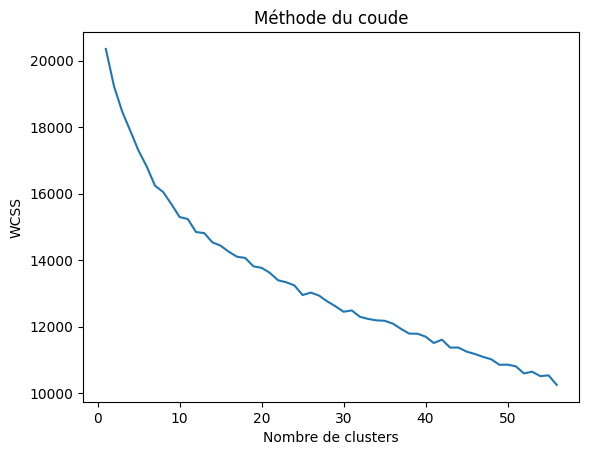

In [16]:
# Sélectionner les variables à utiliser pour le clustering
X = onehot_data[['age', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'FinalGrade', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']]

# Normaliser les données
X_scaled = scaler.fit_transform(X)

# Utiliser la méthode du coude pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1,57):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 57), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

In [57]:
# Création d'une liste des nombres de clusters à tester
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Chargement des données prétraitées avec standard scaler et one hot encoding
X = onehot_data[['age', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'FinalGrade', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']]

# Initialisation d'une liste pour stocker les scores de silhouette pour chaque nombre de clusters
silhouette_scores = []

# Pour chaque nombre de clusters, calcule le score de silhouette moyen sur 5 partitions différentes
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    
    # Définir la métrique de silhouette en tant que score
    silhouette_scorer = make_scorer(silhouette_score)

    # Utiliser cross_val_score avec la métrique de silhouette
    scores = cross_val_score(kmeans, X, scoring=silhouette_scorer, cv=5)
    silhouette_scores.append(scores.mean())

# Affichage des scores de silhouette pour chaque nombre de clusters testé
for i, score in enumerate(silhouette_scores):
  print("Nombre de clusters = {}: Silhouette score moyen = {}".format(num_clusters[i], score))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/

Nombre de clusters = 2: Silhouette score moyen = nan
Nombre de clusters = 3: Silhouette score moyen = nan
Nombre de clusters = 4: Silhouette score moyen = nan
Nombre de clusters = 5: Silhouette score moyen = nan
Nombre de clusters = 6: Silhouette score moyen = nan
Nombre de clusters = 7: Silhouette score moyen = nan
Nombre de clusters = 8: Silhouette score moyen = nan
Nombre de clusters = 9: Silhouette score moyen = nan
Nombre de clusters = 10: Silhouette score moyen = nan


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'

  warnings.warn(


In [58]:
# Utiliser la méthode KMeans pour regrouper les élèves en clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


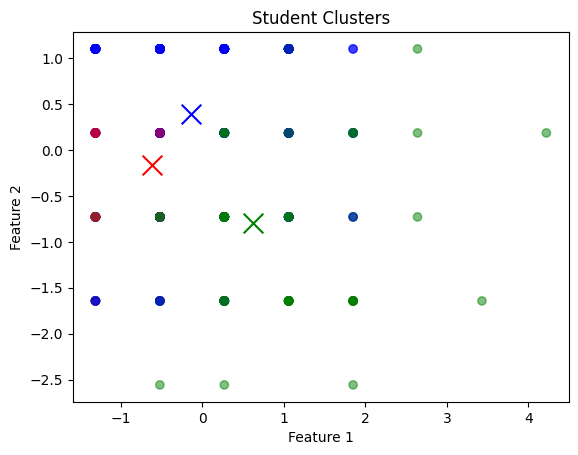

In [59]:
def plot_clusters(data, centers, labels):
    # assign a color to each cluster label
    label_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    colors = [label_colors[label % len(label_colors)] for label in labels]

    # plot the data points
    plt.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.5)

    # plot the cluster centers
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], marker='x', color=label_colors[i % len(label_colors)], s=200)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Student Clusters')
    plt.show()

plot_clusters(X_scaled, kmeans.cluster_centers_, kmeans.labels_)